In [1]:
import prep
import prsa
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = 'data/normokapnia'
files_n = []
for filename in os.listdir(data_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_path, filename)  
        df = prep.read_data(file_path, 'abp_finger[mm_Hg]')
        files_n.append(df)
        prep.describe_file(df, filename)
        print('')

prep.files_time_analysis(files_n)

File name: Ochotnik01_baseline.csv
File size: 59456
Total measurement time: 4:57 min
Percent of missing data: 0.47%
File name: Ochotnik02_baseline.csv
File size: 52727
Total measurement time: 4:23 min
Percent of missing data: 0.73%
File name: Ochotnik03_baseline.csv
File size: 59401
Total measurement time: 4:57 min
Percent of missing data: 0.65%
File name: Ochotnik04_baseline.csv
File size: 59841
Total measurement time: 4:59 min
Percent of missing data: 0.32%
File name: Ochotnik05_baseline.csv
File size: 60541
Total measurement time: 5:02 min
Percent of missing data: 0.43%
File name: Ochotnik06_baseline.csv
File size: 60692
Total measurement time: 5:03 min
Percent of missing data: 0.83%
File name: Ochotnik07_baseline.csv
File size: 60334
Total measurement time: 5:01 min
Percent of missing data: 0.31%
File name: Ochotnik08_baseline.csv
File size: 56974
Total measurement time: 4:44 min
Percent of missing data: 0.68%
File name: Ochotnik09_baseline.csv
File size: 56898
Total measurement ti

In [3]:
data_path = 'data/hiperkapnia'
files_h = []
for filename in os.listdir(data_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_path, filename)
        files_h.append(df)
        df = prep.read_data(file_path, 'abp_finger[mm_Hg]')
        prep.describe_file(df, filename)
        print('')
        
prep.files_time_analysis(files_h)

File name: Ochotnik01_hiperkapnia.csv
File size: 142101
Total measurement time: 11:50 min
Percent of missing data: 27.31%
File name: Ochotnik02_hiperkapnia.csv
File size: 60661
Total measurement time: 5:03 min
Percent of missing data: 0.63%
File name: Ochotnik03_hiperkapnia.csv
File size: 35182
Total measurement time: 2:55 min
Percent of missing data: 0.82%
File name: Ochotnik04_hiperkapnia.csv
File size: 48446
Total measurement time: 4:02 min
Percent of missing data: 0.59%
File name: Ochotnik05_hiperkapnia.csv
File size: 45076
Total measurement time: 3:45 min
Percent of missing data: 0.41%
File name: Ochotnik06_hiperkapnia.csv
File size: 61983
Total measurement time: 5:09 min
Percent of missing data: 0.49%
File name: Ochotnik07_hiperkapnia.csv
File size: 62135
Total measurement time: 5:10 min
Percent of missing data: 0.46%
File name: Ochotnik08_hiperkapnia.csv
File size: 59211
Total measurement time: 4:56 min
Percent of missing data: 0.77%
File name: Ochotnik09_hiperkapnia.csv
File si

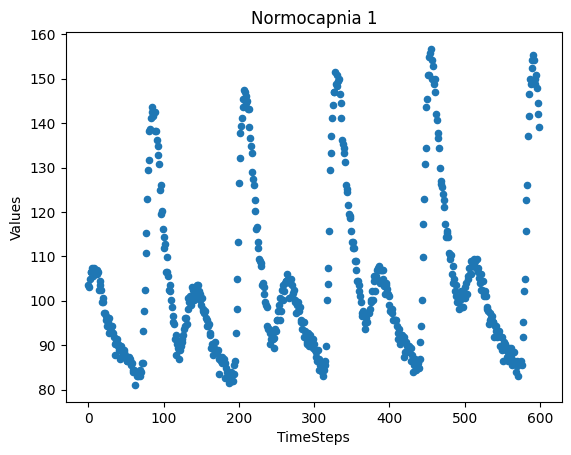

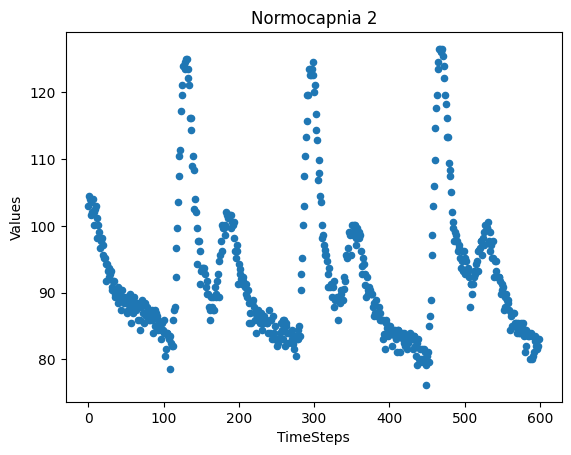

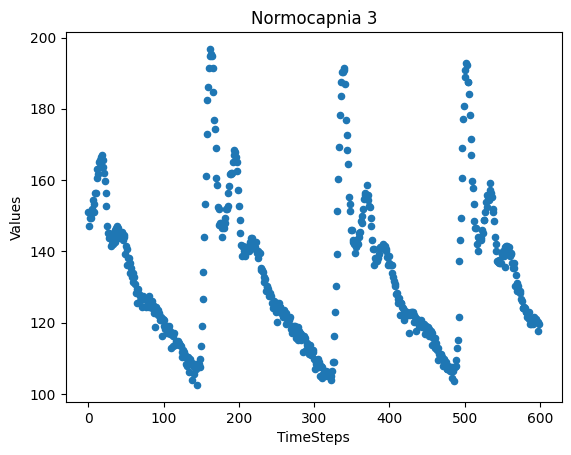

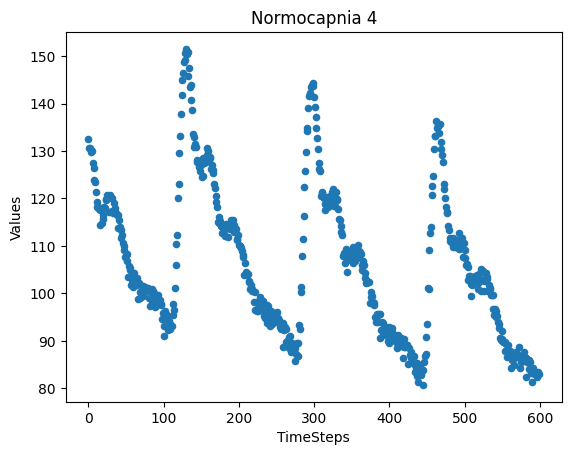

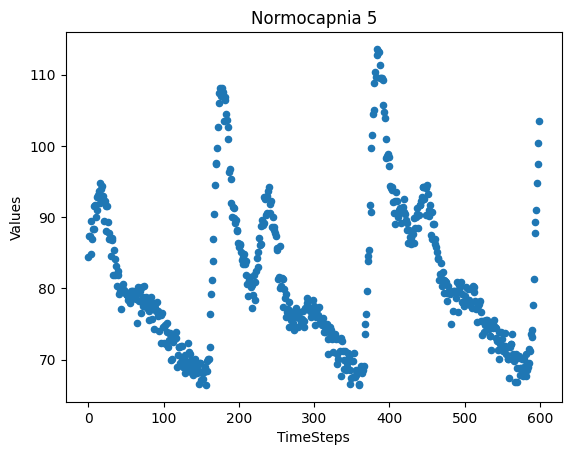

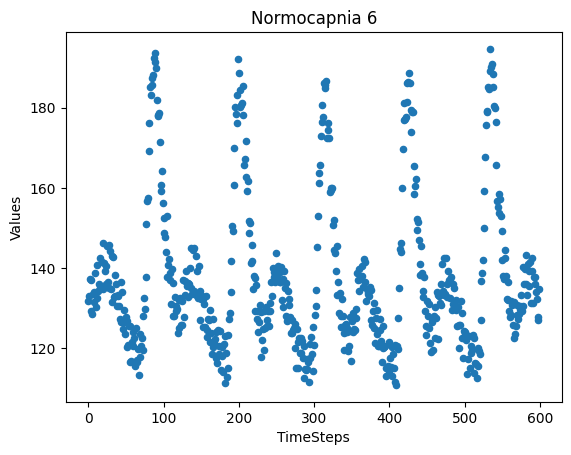

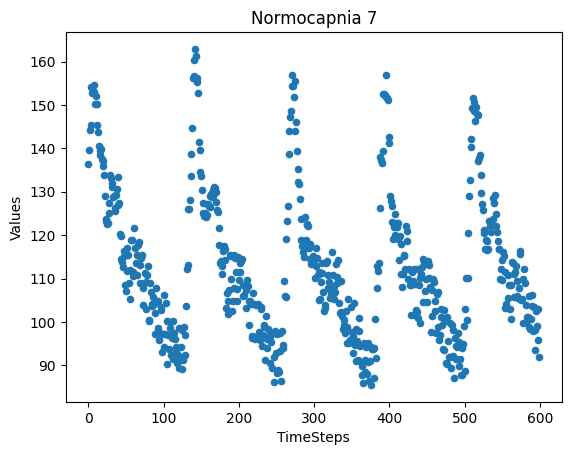

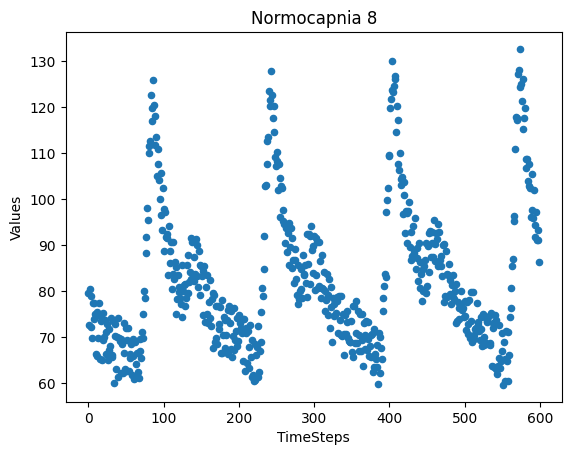

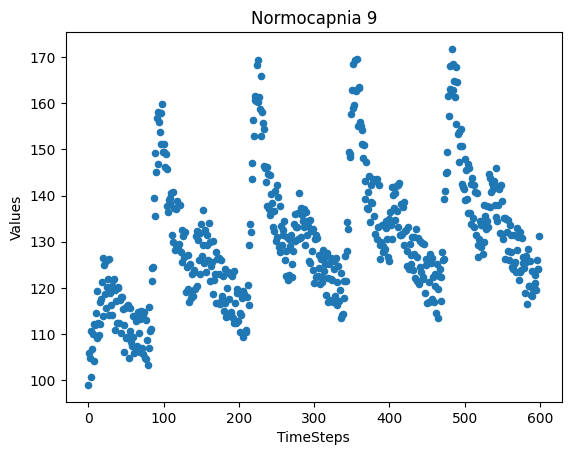

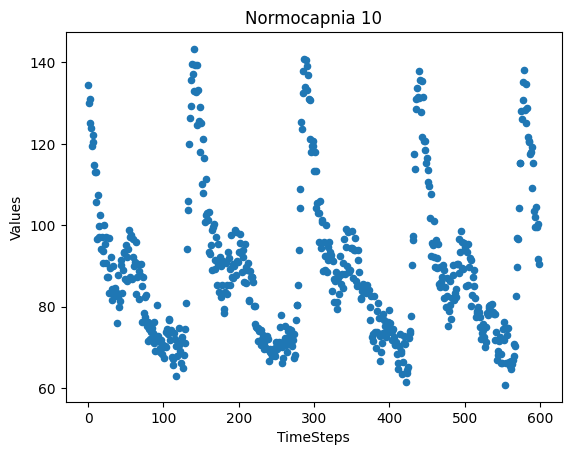

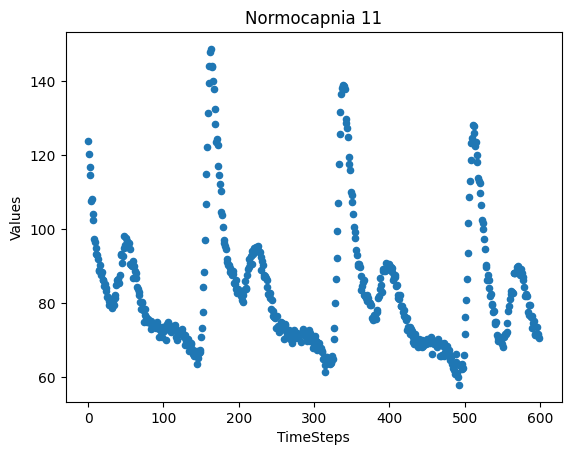

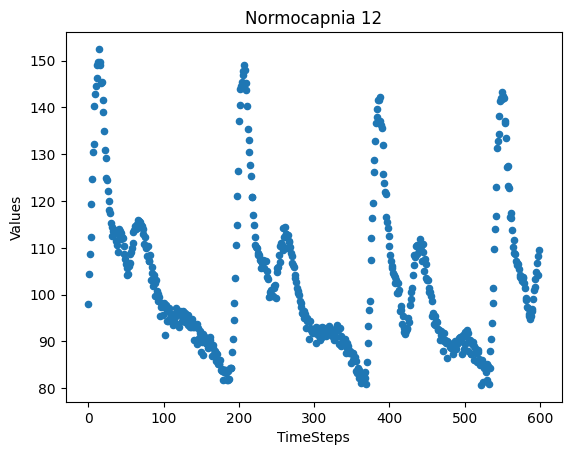

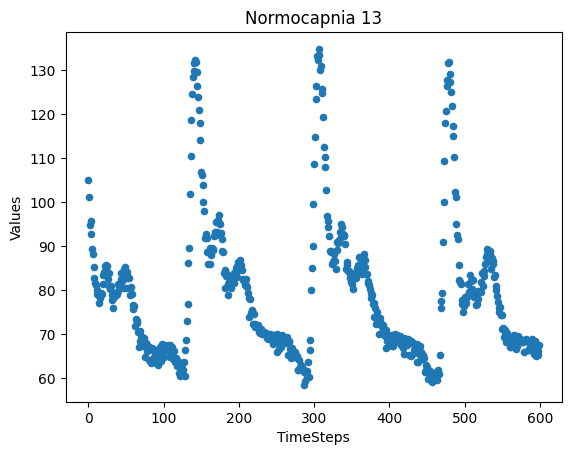

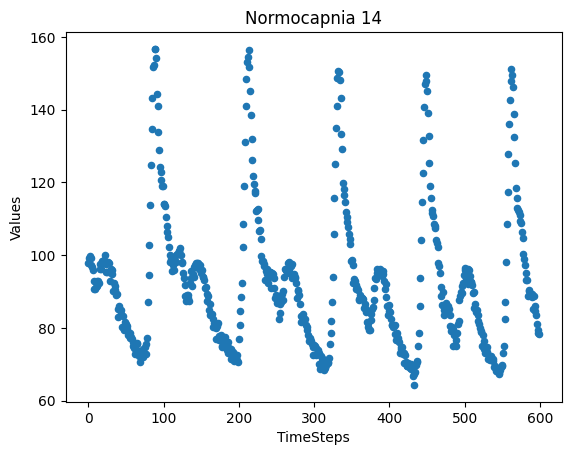

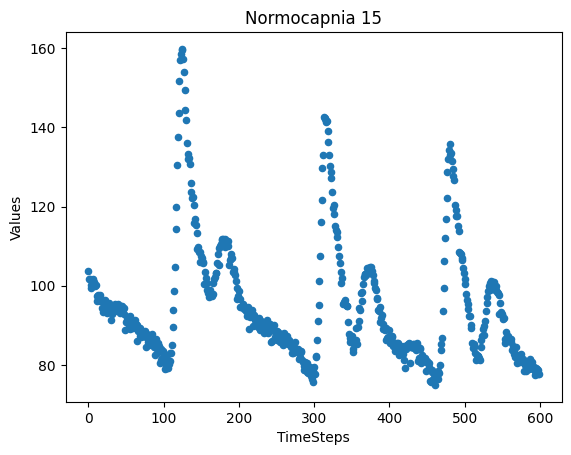

In [4]:
for i, file in enumerate(files_n):
    file.interpolate(method='linear', inplace=True)
    # take first 600 points
    file = file.iloc[:600, :]
    # scatter plot that file
    file.plot.scatter(x='TimeSteps', y='Values')
    plt.title(f'Normocapnia {i+1}')

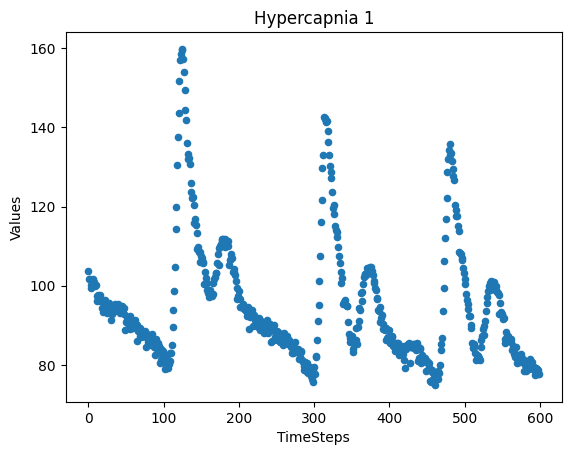

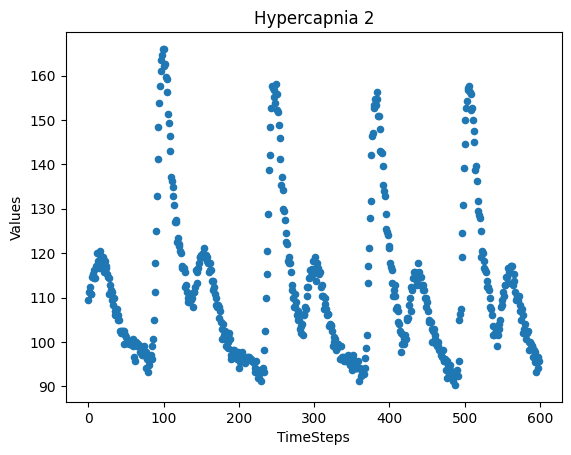

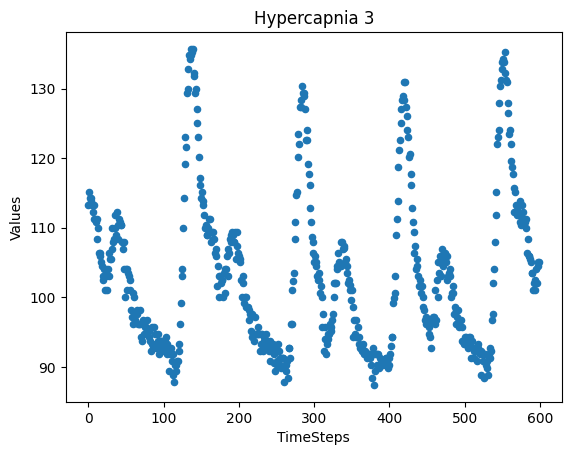

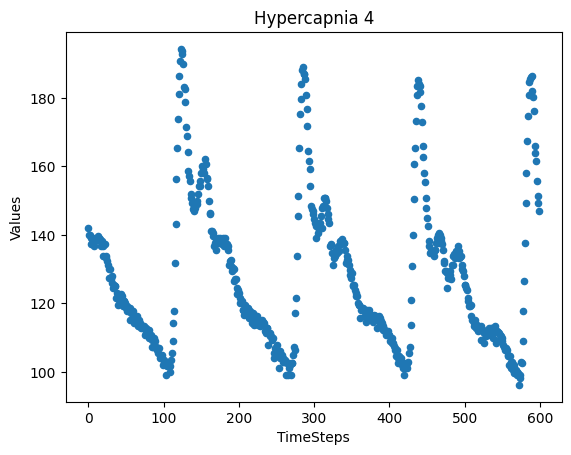

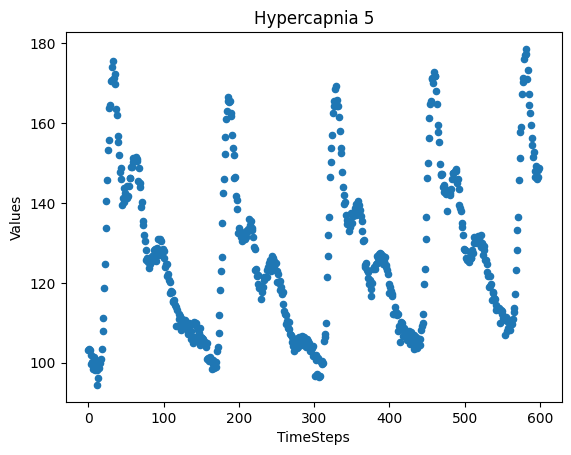

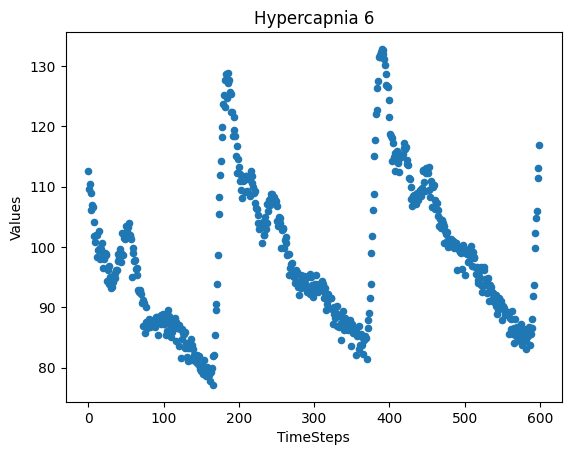

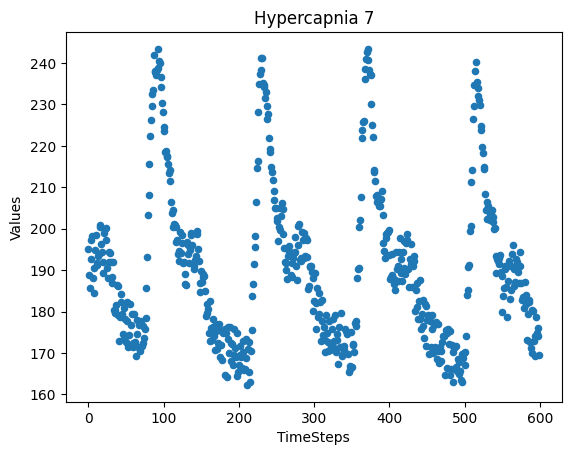

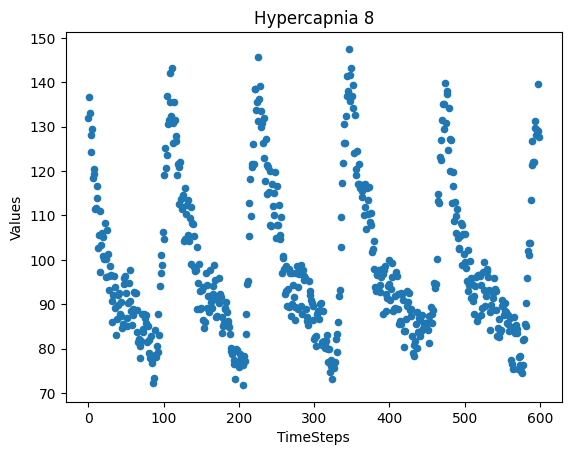

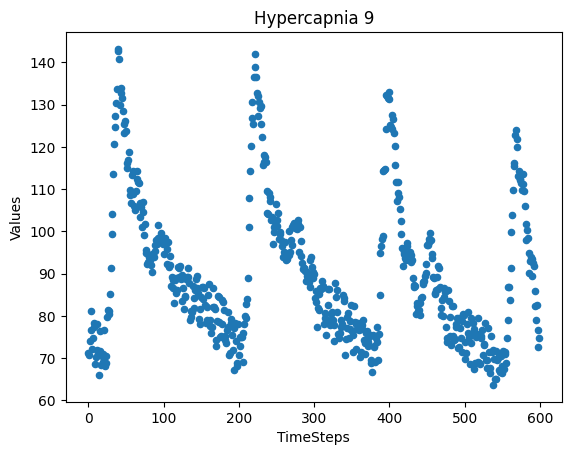

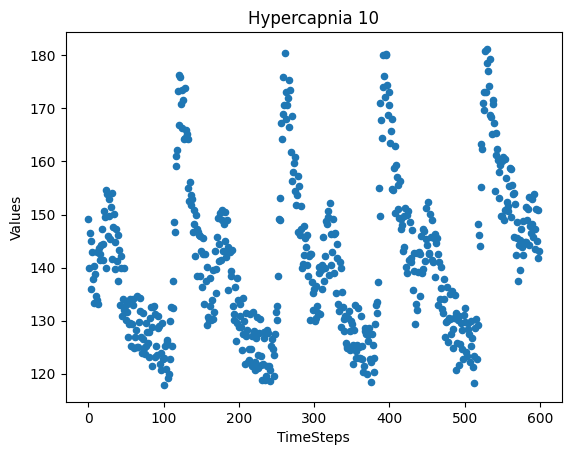

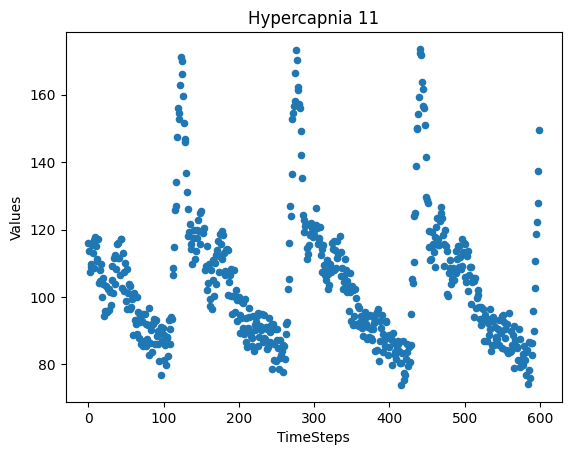

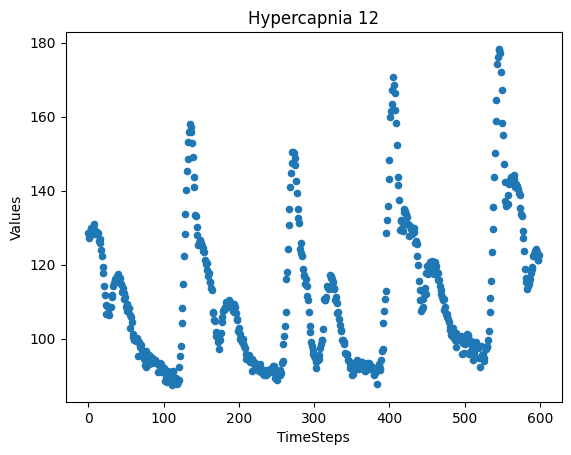

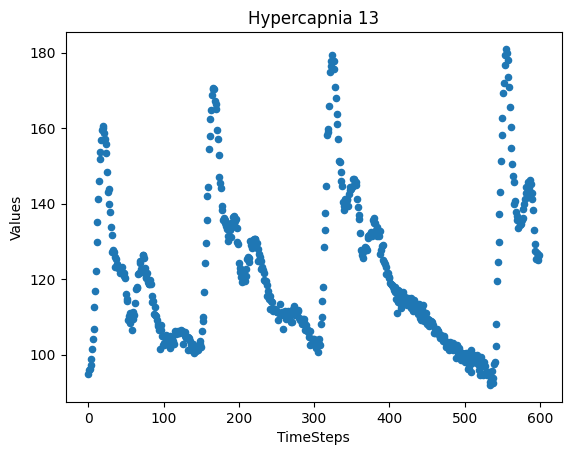

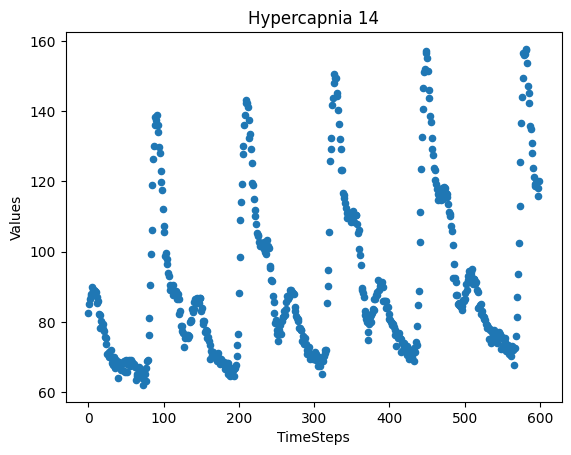

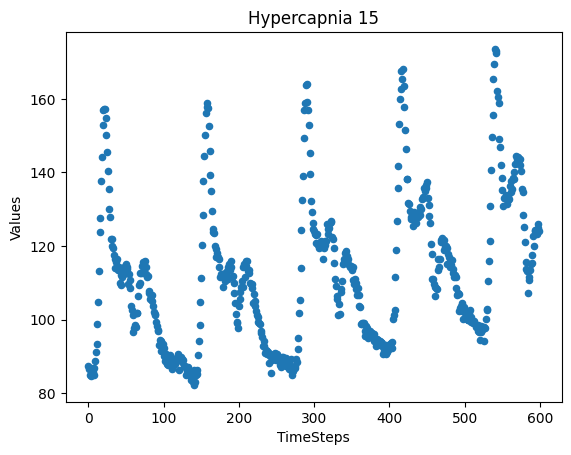

In [5]:
for i, file in enumerate(files_h):
    file.interpolate(method='linear', inplace=True)
    # take first 600 points
    file = file.iloc[:600, :]
    # scatter plot that file
    file.plot.scatter(x='TimeSteps', y='Values')
    plt.title(f'Hypercapnia {i+1}')

In [6]:
data_path = 'data/normokapnia'
mean_abp_all_n = []
hr_mean_all_n = []
for filename in os.listdir(data_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_path, filename)  
        df = prep.read_data(file_path, 'abp_finger[mm_Hg]')
        signal = df['Values'].interpolate(method='linear')
        mean_abp = signal.mean()
        HR = prep.calculate_mean_HR(signal)
        print(f'MEAN: {mean_abp:.2f}, HR: {HR:.2f}')
        mean_abp_all_n.append(mean_abp)
        hr_mean_all_n.append(HR)
print(f'Mean ABP in normocapnia: {np.mean(mean_abp_all_n):.2f} ± {np.std(mean_abp_all_n):.2f}')
print('HR ABP in normocapnia: {:.2f} ± {:.2f}'.format(np.mean(hr_mean_all_n), np.std(hr_mean_all_n)))

MEAN: 106.27, HR: 81.14
MEAN: 97.01, HR: 75.56
MEAN: 130.16, HR: 73.33
MEAN: 105.57, HR: 67.18
MEAN: 80.43, HR: 57.28
MEAN: 135.63, HR: 102.62
MEAN: 112.01, HR: 95.67
MEAN: 85.28, HR: 71.19
MEAN: 138.11, HR: 80.57
MEAN: 92.34, HR: 85.83
MEAN: 88.62, HR: 77.13
MEAN: 96.09, HR: 63.61
MEAN: 71.67, HR: 69.40
MEAN: 99.01, HR: 85.86
MEAN: 90.12, HR: 59.74
Mean ABP in normocapnia: 101.89 ± 19.16
HR ABP in normocapnia: 76.41 ± 12.26


In [7]:
data_path = 'data/hiperkapnia'
mean_abp_all_h = []
hr_mean_all_h = []
for filename in os.listdir(data_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(data_path, filename)  
        df = prep.read_data(file_path, 'abp_finger[mm_Hg]')
        if filename == 'Ochotnik01_hiperkapnia.csv':
            df = df[:45000]
        signal = df['Values'].interpolate(method='linear')
        mean_abp = signal.mean()
        HR = prep.calculate_mean_HR(signal)
        print(f'MEAN: {mean_abp:.2f}, HR: {HR:.2f}')
        mean_abp_all_h.append(mean_abp)
        hr_mean_all_h.append(HR)
print(f'Mean ABP in hypercapnia: {np.mean(mean_abp_all_h):.2f} ± {np.std(mean_abp_all_h):.2f}')
print('HR ABP in hypercapnia: {:.2f} ± {:.2f}'.format(np.mean(hr_mean_all_h), np.std(hr_mean_all_h)))

MEAN: 117.63, HR: 87.20
MEAN: 95.00, HR: 81.30
MEAN: 147.56, HR: 89.02
MEAN: 132.04, HR: 84.47
MEAN: 98.42, HR: 62.83
MEAN: 186.34, HR: 90.61
MEAN: 109.48, HR: 104.87
MEAN: 97.32, HR: 77.42
MEAN: 131.71, HR: 78.88
MEAN: 97.91, HR: 84.83
MEAN: 106.46, HR: 83.12
MEAN: 119.75, HR: 69.04
MEAN: 84.25, HR: 78.30
MEAN: 112.33, HR: 90.26
MEAN: 92.77, HR: 95.03
Mean ABP in hypercapnia: 115.26 ± 25.27
HR ABP in hypercapnia: 83.81 ± 9.86


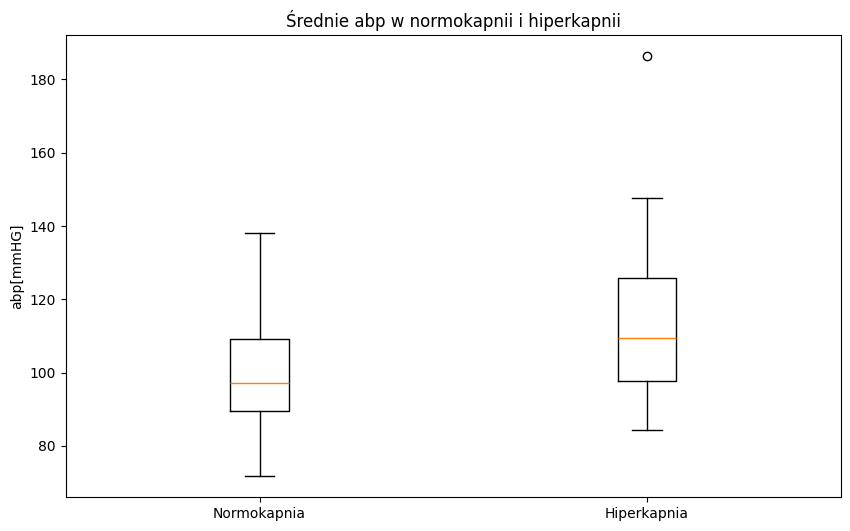

In [8]:
# Box plot for normocapnia and hypercapnia mean abp value
plt.figure(figsize=(10, 6))
plt.boxplot([mean_abp_all_n, mean_abp_all_h], labels=['Normokapnia', 'Hiperkapnia'])
plt.ylabel('abp[mmHG]')
plt.title('Średnie abp w normokapnii i hiperkapnii')
plt.show()

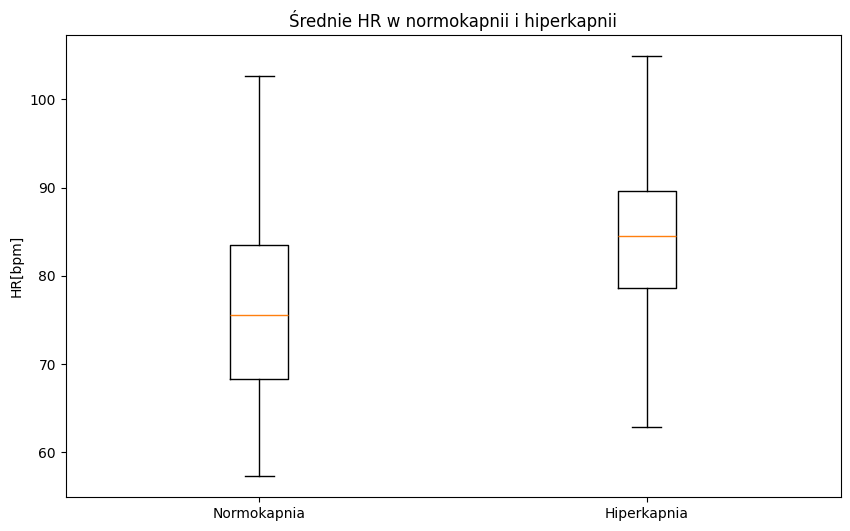

In [9]:
# Box plot for normocapnia and hypercapnia mean heart rate value
plt.figure(figsize=(10, 6))
plt.boxplot([hr_mean_all_n, hr_mean_all_h], labels=['Normokapnia', 'Hiperkapnia'])
plt.ylabel('HR[bpm]')
plt.title('Średnie HR w normokapnii i hiperkapnii')
plt.show()